# Principal Components Analysis Nutrition Exercise
En este ejercicio no vas a montar ningún modelo de Machine Learning supervisado, sino aprenderás a trabajar con PCA: pretratar el dato antes de calcular sus PCs, interpretarlos, graficar y escoger número de componentes según varianza.

Importa las librerías necesarias

In [35]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

### Importa los datos
1. Importa los datos: *nndb.csv*
2. Observa las columnas que hay, así como su tipo.

In [110]:
df = pd.read_csv('data/nndb_flat.csv')
df


,ID,FoodGroup,ShortDescrip,Descrip,CommonName,MfgName,ScientificName,Energy_kcal,Protein_g,Fat_g,...,Folate_USRDA,Niacin_USRDA,Riboflavin_USRDA,Thiamin_USRDA,Calcium_USRDA,Copper_USRDA,Magnesium_USRDA,Phosphorus_USRDA,Selenium_USRDA,Zinc_USRDA
0,1001,Dairy and Egg Products,"BUTTER,WITH SALT","Butter, salted",NaN,NaN,NaN,717.0,0.85,81.11,...,0.0075,0.002625,0.026154,0.004167,0.020000,0.000000,0.004762,0.034286,0.018182,0.008182
1,1002,Dairy and Egg Products,"BUTTER,WHIPPED,WITH SALT","Butter, whipped, with salt",NaN,NaN,NaN,717.0,0.85,81.11,...,0.0075,0.002625,0.026154,0.004167,0.020000,0.000018,0.004762,0.032857,0.018182,0.004545
2,1003,Dairy and Egg Products,"BUTTER OIL,ANHYDROUS","Butter oil, anhydrous",NaN,NaN,NaN,876.0,0.28,99.48,...,0.0000,0.000188,0.003846,0.000833,0.003333,0.000001,0.000000,0.004286,0.000000,0.000909
3,1004,Dairy and Egg Products,"CHEESE,BLUE","Cheese, blue",NaN,NaN,NaN,353.0,21.40,28.74,...,0.0900,0.063500,0.293846,0.024167,0.440000,0.000044,0.054762,0.552857,0.263636,0.241818
4,1005,Dairy and Egg Products,"CHEESE,BRICK","Cheese, brick",NaN,NaN,NaN,371.0,23.24,29.68,...,0.0500,0.007375,0.270000,0.011667,0.561667,0.000027,0.057143,0.644286,0.263636,0.236364
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8613,83110,Finfish and Shellfish Products,"MACKEREL,SALTED","Fish, mackerel, salted",NaN,NaN,NaN,305.0,18.50,25.10,...,0.0375,0.206250,0.146154,0.016667,0.055000,0.000111,0.142857,0.362857,1.334545,0.100000
8614,90240,Finfish and Shellfish Products,"SCALLOP,(BAY&SEA),CKD,STMD","Mollusks, scallop, (bay and sea), cooked, steamed",NaN,NaN,NaN,111.0,20.54,0.84,...,0.0500,0.067250,0.018462,0.010000,0.008333,0.000037,0.088095,0.608571,0.394545,0.140909
8615,90480,Sweets,"SYRUP,CANE","Syrup, Cane",NaN,NaN,NaN,269.0,0.00,0.00,...,0.0000,0.006250,0.046154,0.108333,0.010833,0.000022,0.023810,0.011429,0.012727,0.017273
8616,90560,Finfish and Shellfish Products,"SNAIL,RAW","Mollusks, snail, raw",NaN,NaN,NaN,90.0,16.10,1.40,...,0.0150,0.087500,0.092308,0.008333,0.008333,0.000444,0.595238,0.388571,0.498182,0.090909


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8618 entries, 0 to 8617
Data columns (total 45 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   ID                8618 non-null   int64  
 1   FoodGroup         8618 non-null   object 
 2   ShortDescrip      8618 non-null   object 
 3   Descrip           8618 non-null   object 
 4   CommonName        1063 non-null   object 
 5   MfgName           1560 non-null   object 
 6   ScientificName    732 non-null    object 
 7   Energy_kcal       8618 non-null   float64
 8   Protein_g         8618 non-null   float64
 9   Fat_g             8618 non-null   float64
 10  Carb_g            8618 non-null   float64
 11  Sugar_g           8618 non-null   float64
 12  Fiber_g           8618 non-null   float64
 13  VitA_mcg          8618 non-null   float64
 14  VitB6_mg          8618 non-null   float64
 15  VitB12_mcg        8618 non-null   float64
 16  VitC_mg           8618 non-null   float64


### Mira a ver la correlación entre las variables numéricas
¿Qué pasa con las columnas USRDA? ¿Hay que tomar alguna decisión?

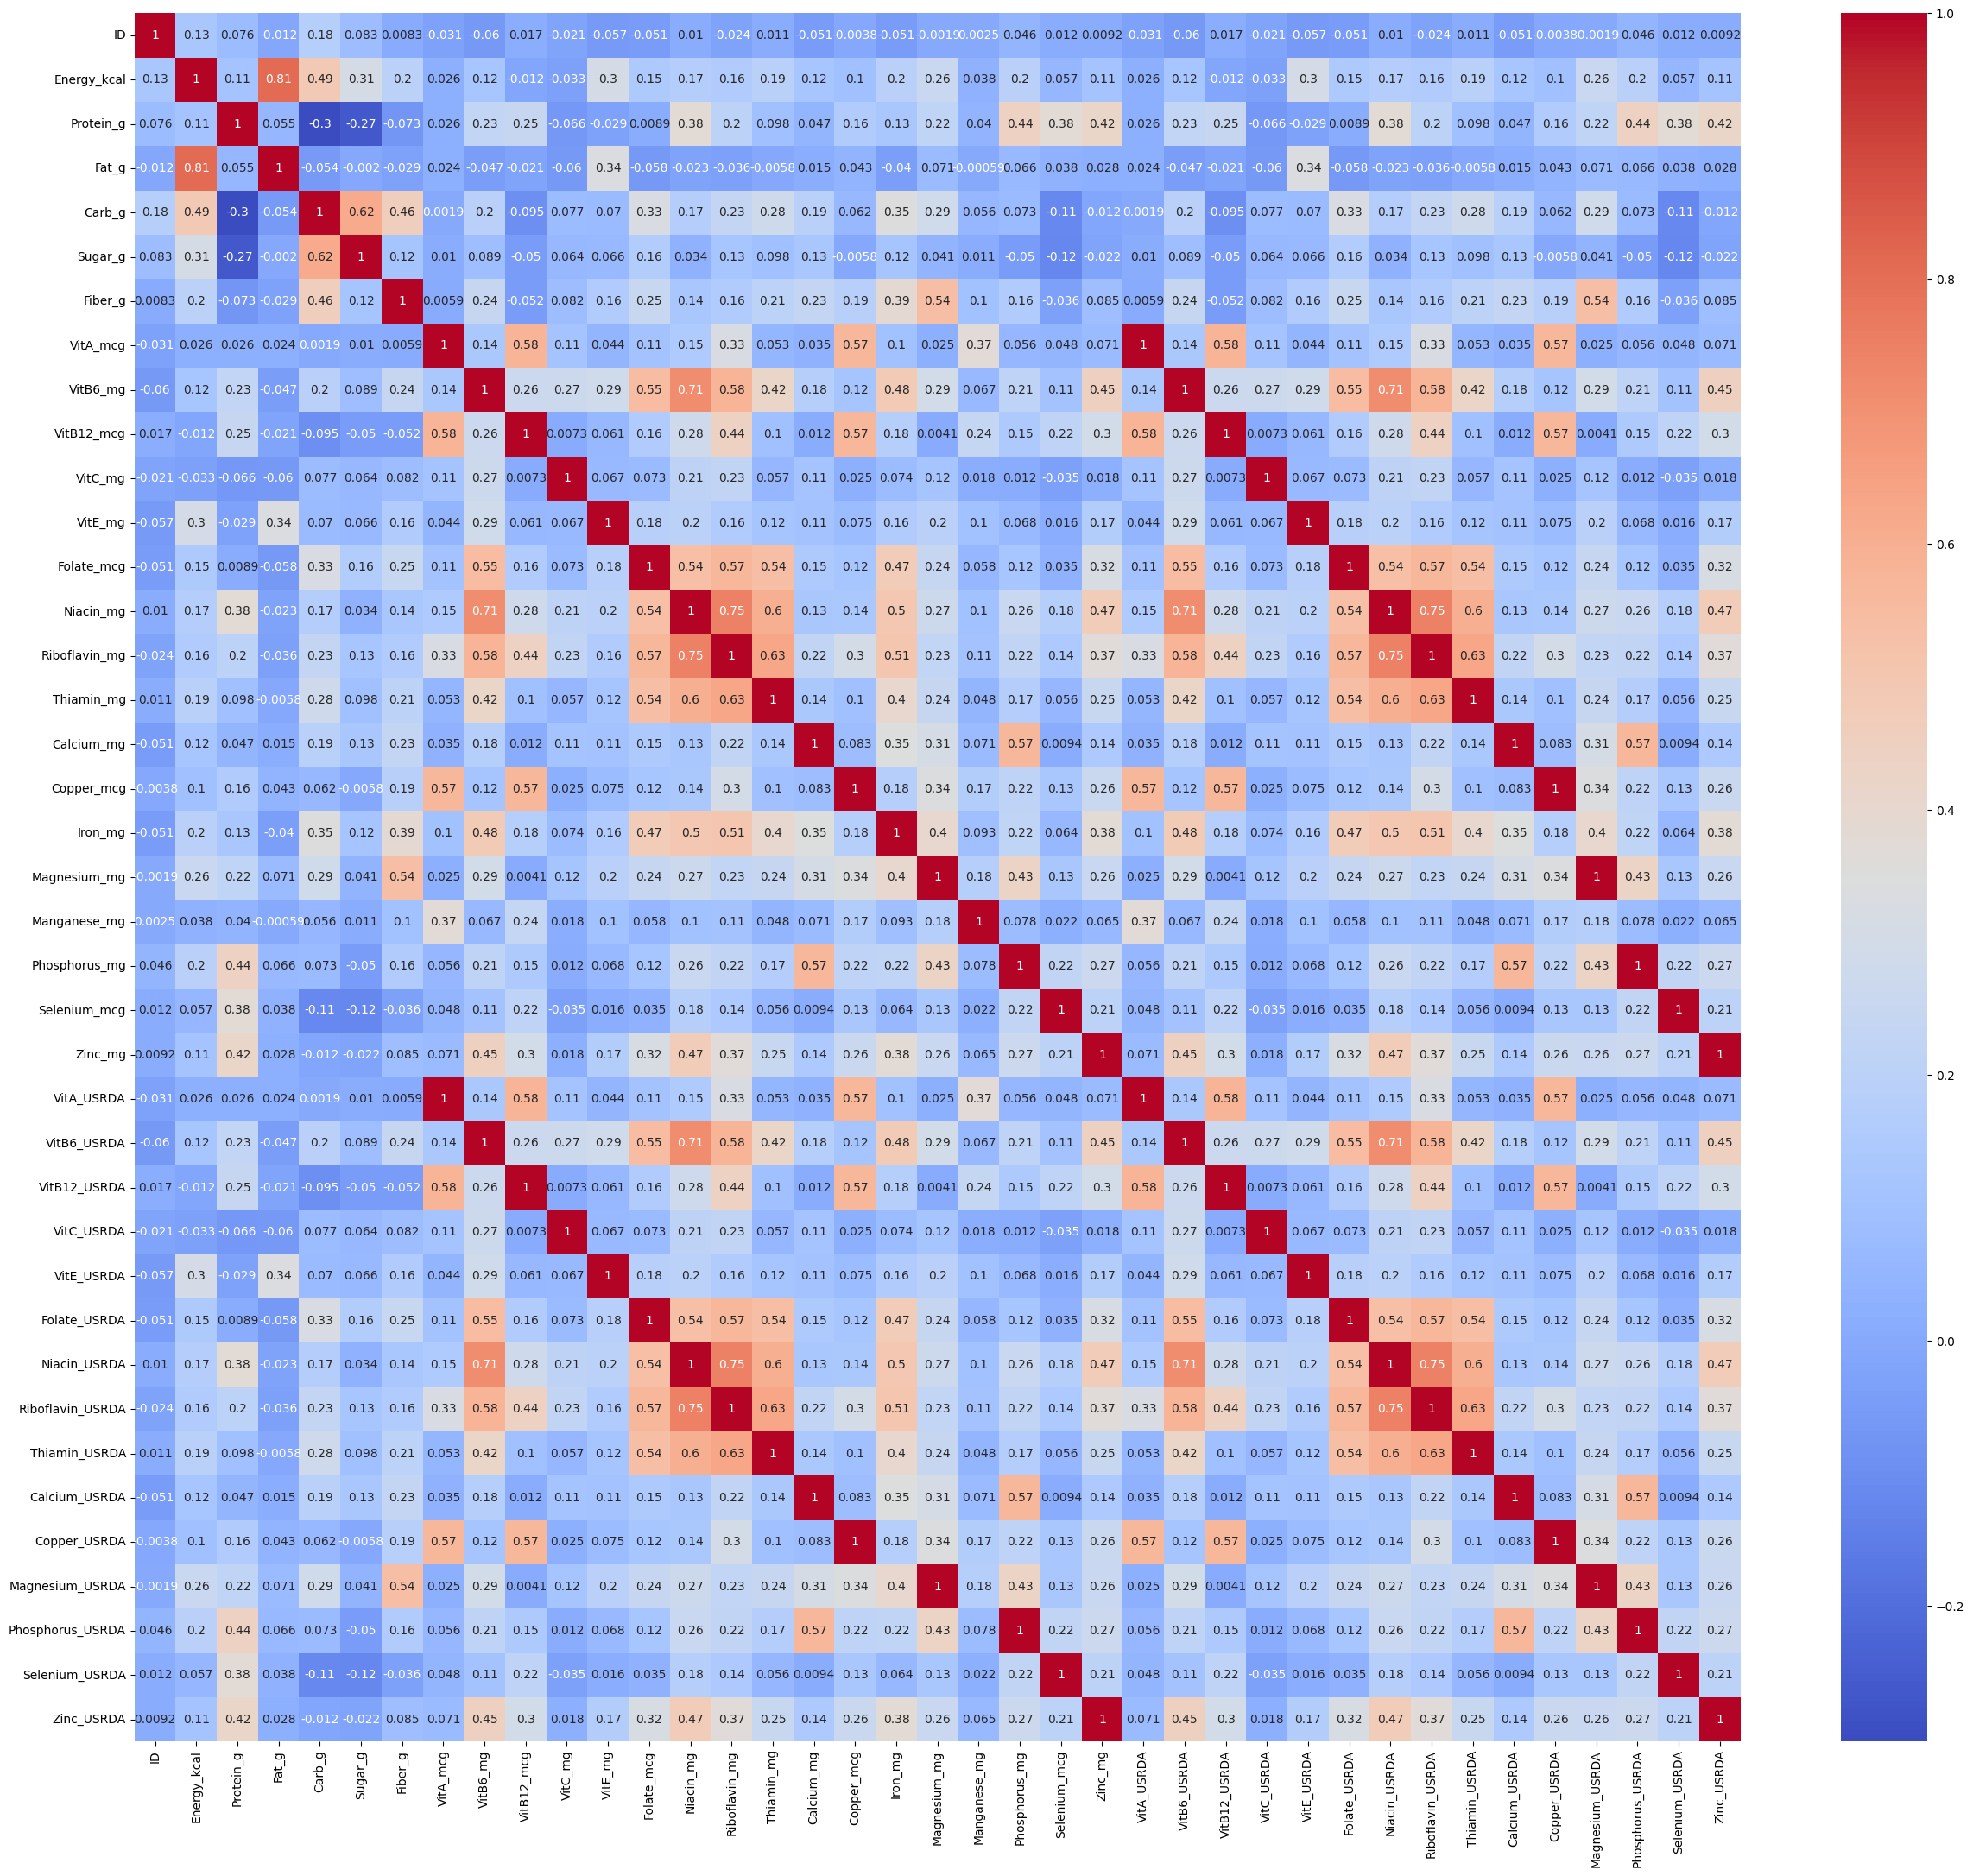

In [10]:
numeric_df = df.select_dtypes(include=['number'])
corr_matrix = numeric_df.corr()
plt.figure(figsize=(30,26))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.show()


### Vemos la colinealidad entre las features_USRDA y su equivalente base. Habria que eliminar una de ellas, yo eliminare las USRDA y me quedare con los valores absolutos.

### Variables no numéricas
Elimina las variables de texto del dataset

In [87]:
# Identificar columnas USRDA
usrda_cols = [col for col in df.columns if 'USRDA' in col]
usrda_cols.append("ID")

# Identificar columnas Objects
text_cols = df.columns[df.dtypes == 'object']


In [88]:
all_cols_to_drop = list(text_cols) + usrda_cols
df_clean = df.drop(columns=all_cols_to_drop)


In [90]:
df_clean

,Energy_kcal,Protein_g,Fat_g,Carb_g,Sugar_g,Fiber_g,VitA_mcg,VitB6_mg,VitB12_mcg,VitC_mg,...,Riboflavin_mg,Thiamin_mg,Calcium_mg,Copper_mcg,Iron_mg,Magnesium_mg,Manganese_mg,Phosphorus_mg,Selenium_mcg,Zinc_mg
0,717.0,0.85,81.11,0.06,0.06,0.0,684.0,0.003,0.17,0.0,...,0.034,0.005,24.0,0.000,0.02,2.0,0.000,24.0,1.0,0.09
1,717.0,0.85,81.11,0.06,0.06,0.0,684.0,0.003,0.13,0.0,...,0.034,0.005,24.0,0.016,0.16,2.0,0.004,23.0,1.0,0.05
2,876.0,0.28,99.48,0.00,0.00,0.0,840.0,0.001,0.01,0.0,...,0.005,0.001,4.0,0.001,0.00,0.0,0.000,3.0,0.0,0.01
3,353.0,21.40,28.74,2.34,0.50,0.0,198.0,0.166,1.22,0.0,...,0.382,0.029,528.0,0.040,0.31,23.0,0.009,387.0,14.5,2.66
4,371.0,23.24,29.68,2.79,0.51,0.0,292.0,0.065,1.26,0.0,...,0.351,0.014,674.0,0.024,0.43,24.0,0.012,451.0,14.5,2.60
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8613,305.0,18.50,25.10,0.00,0.00,0.0,47.0,0.410,12.00,0.0,...,0.190,0.020,66.0,0.100,1.40,60.0,0.000,254.0,73.4,1.10
8614,111.0,20.54,0.84,5.41,0.00,0.0,2.0,0.112,2.15,0.0,...,0.024,0.012,10.0,0.033,0.58,37.0,0.029,426.0,21.7,1.55
8615,269.0,0.00,0.00,73.14,73.20,0.0,0.0,0.000,0.00,0.0,...,0.060,0.130,13.0,0.020,3.60,10.0,0.000,8.0,0.7,0.19
8616,90.0,16.10,1.40,2.00,0.00,0.0,30.0,0.130,0.50,0.0,...,0.120,0.010,10.0,0.400,3.50,250.0,0.000,272.0,27.4,1.00


In [91]:
df_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8618 entries, 0 to 8617
Data columns (total 23 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Energy_kcal    8618 non-null   float64
 1   Protein_g      8618 non-null   float64
 2   Fat_g          8618 non-null   float64
 3   Carb_g         8618 non-null   float64
 4   Sugar_g        8618 non-null   float64
 5   Fiber_g        8618 non-null   float64
 6   VitA_mcg       8618 non-null   float64
 7   VitB6_mg       8618 non-null   float64
 8   VitB12_mcg     8618 non-null   float64
 9   VitC_mg        8618 non-null   float64
 10  VitE_mg        8618 non-null   float64
 11  Folate_mcg     8618 non-null   float64
 12  Niacin_mg      8618 non-null   float64
 13  Riboflavin_mg  8618 non-null   float64
 14  Thiamin_mg     8618 non-null   float64
 15  Calcium_mg     8618 non-null   float64
 16  Copper_mcg     8618 non-null   float64
 17  Iron_mg        8618 non-null   float64
 18  Magnesiu

In [92]:
df_clean.isnull().sum()

Energy_kcal      0
Protein_g        0
Fat_g            0
Carb_g           0
Sugar_g          0
Fiber_g          0
VitA_mcg         0
VitB6_mg         0
VitB12_mcg       0
VitC_mg          0
VitE_mg          0
Folate_mcg       0
Niacin_mg        0
Riboflavin_mg    0
Thiamin_mg       0
Calcium_mg       0
Copper_mcg       0
Iron_mg          0
Magnesium_mg     0
Manganese_mg     0
Phosphorus_mg    0
Selenium_mcg     0
Zinc_mg          0
dtype: int64

### Distribuciones
Muchas de las variables tienen asimetría hacia la derecha. Deberíamos transformarlas para conseguir distribuciones normales y mejorar las correlaciones de cara al PCA y a futuros modelos lineales que vayamos a probar. Transforma todas las variables realizando una transformación Logarítmica.

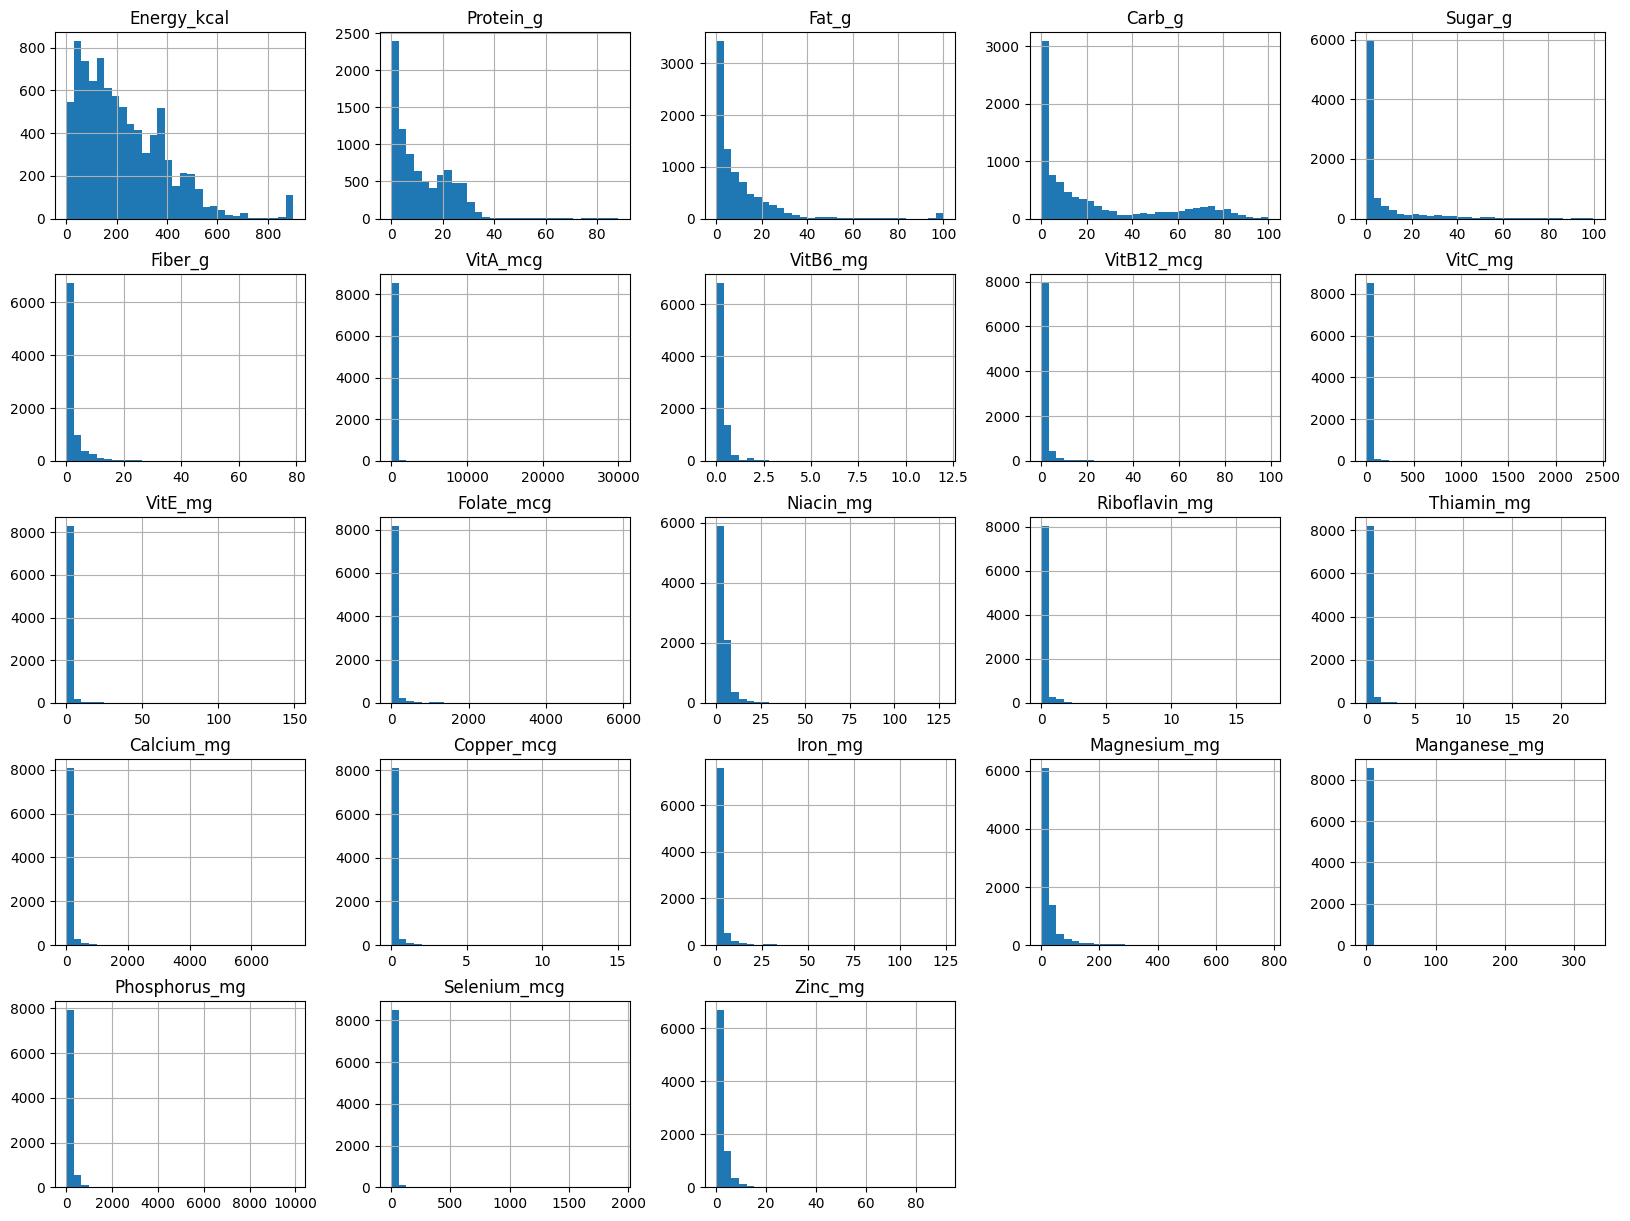

In [93]:
df_clean.hist(bins=30, figsize=(20,15))
plt.show()


### Aplicamos logaritmo

In [94]:
df_log = np.log1p(df_clean)

### Estandarizado
Estandariza cada variable.

No es necesario que dividas en train y test.

In [95]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
df_scaled = scaler.fit_transform(df_log)
df_scaled = pd.DataFrame(df_scaled, columns=df_log.columns)
df_scaled

,Energy_kcal,Protein_g,Fat_g,Carb_g,Sugar_g,Fiber_g,VitA_mcg,VitB6_mg,VitB12_mcg,VitC_mg,...,Riboflavin_mg,Thiamin_mg,Calcium_mg,Copper_mcg,Iron_mg,Magnesium_mg,Manganese_mg,Phosphorus_mg,Selenium_mcg,Zinc_mg
0,1.540414,-1.379699,2.222526,-1.279339,-0.751381,-0.817818,2.363105,-0.811366,-0.453749,-0.63502,...,-0.685619,-0.682602,0.043491,-0.624237,-1.290969,-1.323615,-0.478294,-0.607193,-0.700775,-1.026533
1,1.540414,-1.379699,2.222526,-1.279339,-0.751381,-0.817818,2.363105,-0.811366,-0.506894,-0.63502,...,-0.685619,-0.682602,0.043491,-0.545958,-1.110402,-1.323615,-0.467870,-0.630949,-0.700775,-1.080292
2,1.745661,-1.728220,2.393490,-1.315522,-0.796963,-0.817818,2.463472,-0.819681,-0.678411,-0.63502,...,-0.816970,-0.700558,-1.024481,-0.619308,-1.318770,-2.173767,-0.478294,-1.673624,-1.184060,-1.136139
3,0.814824,0.980084,1.362565,-0.566664,-0.479778,-0.817818,1.758419,-0.184016,0.524785,-0.63502,...,0.653867,-0.576344,2.068775,-0.430822,-0.939676,0.285544,-0.454898,0.988529,0.726947,0.715166
4,0.865713,1.054782,1.388915,-0.488178,-0.474580,-0.817818,1.947668,-0.561485,0.552068,-0.63502,...,0.549115,-0.642461,2.230503,-0.507280,-0.816626,0.317134,-0.447146,1.077376,0.726947,0.691398
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8613,0.665317,0.848892,1.252011,-1.315522,-0.796963,-0.817818,1.062751,0.607592,3.225009,-0.63502,...,-0.036792,-0.615898,0.697647,-0.154219,-0.089688,1.007399,-0.478294,0.744270,1.820639,-0.083621
8614,-0.365945,0.943039,-0.993791,-0.161868,-0.796963,-0.817818,-0.293552,-0.381569,1.059341,-0.63502,...,-0.730492,-0.651350,-0.501286,-0.464127,-0.676585,0.641150,-0.403646,1.044265,0.992959,0.195555
8615,0.536895,-1.961806,-1.510128,1.358297,2.572113,-0.817818,-0.830974,-0.823845,-0.693613,-0.63502,...,-0.570950,-0.154777,-0.341258,-0.526581,0.823681,-0.318175,-0.478294,-1.201721,-0.814088,-0.900321
8616,-0.578992,0.724618,-0.768799,-0.633329,-0.796963,-0.817818,0.848873,-0.314672,-0.074160,-0.63502,...,-0.316719,-0.660257,-0.501286,1.035060,0.792824,2.102060,-0.478294,0.783962,1.149156,-0.153776


### Implementación del PCA
Prueba a montar un PCA con todos los componentes. Para ello utiliza los datos previamente transformados y escalados.

In [96]:
from sklearn.decomposition import PCA

pca = PCA()


In [97]:
pca_result = pca.fit_transform(df_scaled)


### Aportación de cada PCA
Visualiza en un diagrama de líneas la suma acumulada de la varianza explicativa del PCA.

Si tuviéses que quedarte con 70-75 % de la varianza original, ¿con cuántos Principal Components te quedarías?

In [98]:
explained_var = pca.explained_variance_ratio_

explained_var

array([0.3125111 , 0.16666503, 0.08532219, 0.07111741, 0.05904531,
       0.04487789, 0.03079514, 0.02718658, 0.02537361, 0.02262291,
       0.02194625, 0.01905314, 0.01852623, 0.01432524, 0.01349698,
       0.01297861, 0.01120283, 0.00974457, 0.00929553, 0.00746957,
       0.00693989, 0.00566242, 0.00384157])

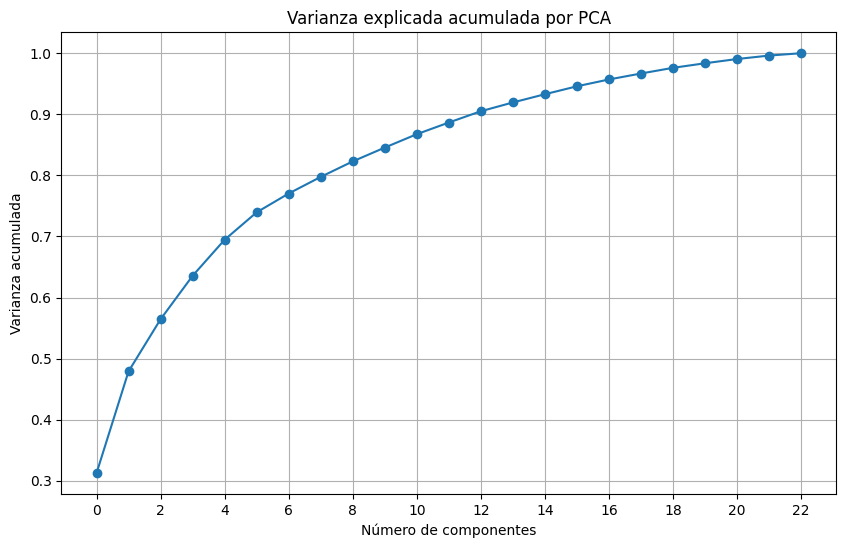

In [99]:
plt.figure(figsize=(10,6))
plt.plot(np.cumsum(explained_var), marker='o')
plt.xlabel('Número de componentes')
plt.ylabel('Varianza acumulada')
plt.title('Varianza explicada acumulada por PCA')
plt.grid(True)
num_components = len(explained_var)
plt.xticks(np.arange(0, num_components, 2))
plt.show()


### Si queremos representar el 70-75% de la varianza, tenemos que coger 5-6 componentes

## Feat. Red
Crea un nuevo PCA con X Principal Components, siendo X la cantidad de PC escogidos en el apartado anterior.

Obtén el nuevo dataset con el mismo número de registros que el original, pero en este caso con X features, que representan los PC elegidos.

In [100]:
pca_2 = PCA(n_components=6)
proyecciones = pca_2.fit_transform(df_scaled)



### Reconstruccion

In [101]:
reconstruccion = pca_2.inverse_transform(proyecciones)
reconstruccion = pd.DataFrame(
    reconstruccion,
    columns = df_scaled.columns,
    index = df_scaled.index
)

display(reconstruccion)

,Energy_kcal,Protein_g,Fat_g,Carb_g,Sugar_g,Fiber_g,VitA_mcg,VitB6_mg,VitB12_mcg,VitC_mg,...,Riboflavin_mg,Thiamin_mg,Calcium_mg,Copper_mcg,Iron_mg,Magnesium_mg,Manganese_mg,Phosphorus_mg,Selenium_mcg,Zinc_mg
0,0.939457,-0.625019,1.904081,-0.558723,0.385829,-1.138491,1.465287,-0.964117,-0.104472,-0.179963,...,-0.887869,-1.374781,0.008912,-0.507731,-1.358592,-1.103231,-0.787479,-0.698956,-0.083455,-0.731940
1,0.946937,-0.630624,1.897473,-0.534545,0.391890,-1.101349,1.440843,-0.951366,-0.116608,-0.173553,...,-0.878973,-1.351727,0.000338,-0.475737,-1.334425,-1.088888,-0.747602,-0.703159,-0.094940,-0.726251
2,1.018379,-1.104164,2.100508,-0.680425,0.485428,-1.226380,1.042790,-0.917607,-0.147280,-0.178281,...,-0.971727,-1.352215,-0.891128,-0.598668,-1.521137,-1.863654,-0.907481,-1.519045,-0.589565,-0.991896
3,0.643432,0.932635,1.068285,-0.435533,-0.026595,-0.916138,1.729433,-0.369031,0.511202,-0.358501,...,-0.045203,-0.679464,1.624575,-0.455952,-0.377542,0.679114,-0.736683,1.345362,1.221563,0.361662
4,0.691681,0.896337,1.150332,-0.368820,0.031480,-0.940231,1.848980,-0.602777,0.357014,-0.420735,...,-0.226372,-0.865398,1.799528,-0.533487,-0.535721,0.693611,-0.777870,1.386018,1.216895,0.231474
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8613,0.640422,1.098159,1.444256,-1.477217,-0.762524,-1.386654,1.528706,0.502553,1.429340,-0.195538,...,0.375417,-0.483772,0.511291,0.211818,-0.122504,0.363725,-0.478636,0.969353,1.510937,1.051916
8614,-0.585882,0.699212,-0.355861,-0.870879,-1.001706,-0.692816,-0.084685,-0.353751,0.239545,-0.440824,...,-0.455603,-0.660170,0.256155,-0.146063,-0.372782,0.403862,-0.292193,0.665548,0.736202,0.336422
8615,0.066733,-1.090448,-0.391618,1.289301,1.293332,0.631067,-0.616406,-0.659862,-1.103657,-0.023286,...,-0.295902,0.230492,-0.278555,-1.057906,-0.295281,-0.960330,-0.568815,-1.026892,-1.387310,-1.258147
8616,-0.122546,0.380499,0.434223,-0.938925,-0.979295,-0.461221,0.755604,-0.029297,0.396269,0.172461,...,-0.350722,-0.764554,0.288386,1.019728,-0.262411,0.607450,0.710967,0.476144,0.833309,0.550922


In [102]:
df_scaled

,Energy_kcal,Protein_g,Fat_g,Carb_g,Sugar_g,Fiber_g,VitA_mcg,VitB6_mg,VitB12_mcg,VitC_mg,...,Riboflavin_mg,Thiamin_mg,Calcium_mg,Copper_mcg,Iron_mg,Magnesium_mg,Manganese_mg,Phosphorus_mg,Selenium_mcg,Zinc_mg
0,1.540414,-1.379699,2.222526,-1.279339,-0.751381,-0.817818,2.363105,-0.811366,-0.453749,-0.63502,...,-0.685619,-0.682602,0.043491,-0.624237,-1.290969,-1.323615,-0.478294,-0.607193,-0.700775,-1.026533
1,1.540414,-1.379699,2.222526,-1.279339,-0.751381,-0.817818,2.363105,-0.811366,-0.506894,-0.63502,...,-0.685619,-0.682602,0.043491,-0.545958,-1.110402,-1.323615,-0.467870,-0.630949,-0.700775,-1.080292
2,1.745661,-1.728220,2.393490,-1.315522,-0.796963,-0.817818,2.463472,-0.819681,-0.678411,-0.63502,...,-0.816970,-0.700558,-1.024481,-0.619308,-1.318770,-2.173767,-0.478294,-1.673624,-1.184060,-1.136139
3,0.814824,0.980084,1.362565,-0.566664,-0.479778,-0.817818,1.758419,-0.184016,0.524785,-0.63502,...,0.653867,-0.576344,2.068775,-0.430822,-0.939676,0.285544,-0.454898,0.988529,0.726947,0.715166
4,0.865713,1.054782,1.388915,-0.488178,-0.474580,-0.817818,1.947668,-0.561485,0.552068,-0.63502,...,0.549115,-0.642461,2.230503,-0.507280,-0.816626,0.317134,-0.447146,1.077376,0.726947,0.691398
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8613,0.665317,0.848892,1.252011,-1.315522,-0.796963,-0.817818,1.062751,0.607592,3.225009,-0.63502,...,-0.036792,-0.615898,0.697647,-0.154219,-0.089688,1.007399,-0.478294,0.744270,1.820639,-0.083621
8614,-0.365945,0.943039,-0.993791,-0.161868,-0.796963,-0.817818,-0.293552,-0.381569,1.059341,-0.63502,...,-0.730492,-0.651350,-0.501286,-0.464127,-0.676585,0.641150,-0.403646,1.044265,0.992959,0.195555
8615,0.536895,-1.961806,-1.510128,1.358297,2.572113,-0.817818,-0.830974,-0.823845,-0.693613,-0.63502,...,-0.570950,-0.154777,-0.341258,-0.526581,0.823681,-0.318175,-0.478294,-1.201721,-0.814088,-0.900321
8616,-0.578992,0.724618,-0.768799,-0.633329,-0.796963,-0.817818,0.848873,-0.314672,-0.074160,-0.63502,...,-0.316719,-0.660257,-0.501286,1.035060,0.792824,2.102060,-0.478294,0.783962,1.149156,-0.153776


### Desescalado

In [103]:
reconstruccion_unscaled = scaler.inverse_transform(reconstruccion)
reconstruccion_unscaled = pd.DataFrame(
    reconstruccion_unscaled,
    columns=df_scaled.columns,
    index=df_scaled.index
)


In [104]:
reconstruccion_unscaled

,Energy_kcal,Protein_g,Fat_g,Carb_g,Sugar_g,Fiber_g,VitA_mcg,VitB6_mg,VitB12_mcg,VitC_mg,...,Riboflavin_mg,Thiamin_mg,Calcium_mg,Copper_mcg,Iron_mg,Magnesium_mg,Manganese_mg,Phosphorus_mg,Selenium_mcg,Zinc_mg
0,5.990767,1.412750,4.031994,1.218760,1.511989,-0.262758,4.694076,-0.033670,0.385624,0.576155,...,-0.010367,-0.148745,3.166766,0.023625,-0.028364,1.383404,-0.118406,3.061189,1.578531,0.291056
1,5.998056,1.406825,4.024190,1.257695,1.519737,-0.232325,4.644107,-0.030609,0.377680,0.584271,...,-0.008441,-0.143625,3.153844,0.030113,-0.011151,1.401939,-0.103134,3.053965,1.562058,0.295012
2,6.067685,0.906377,4.263964,1.022768,1.639309,-0.334775,3.830398,-0.022506,0.357604,0.578285,...,-0.028529,-0.143734,1.810401,0.005185,-0.144144,0.400744,-0.164362,1.651927,0.852648,0.110266
3,5.702255,3.058916,3.044965,1.417146,0.984779,-0.080564,5.234050,0.109170,0.788616,0.350106,...,0.172132,0.005685,5.601576,0.034125,0.670432,3.686646,-0.098953,6.574196,3.450238,1.051615
4,5.749280,3.020555,3.141858,1.524581,1.059017,-0.100305,5.478431,0.053063,0.687692,0.271310,...,0.132895,-0.035611,5.865232,0.018402,0.557762,3.705379,-0.114726,6.644060,3.443543,0.961074
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8613,5.699322,3.233846,3.488966,-0.260396,0.044024,-0.466102,4.823718,0.318377,1.389587,0.556436,...,0.263227,0.049148,3.923853,0.169535,0.852094,3.279084,-0.000131,5.928053,3.865270,1.531660
8614,4.504145,2.812229,1.363126,0.716058,-0.261727,0.102426,1.525583,0.112837,0.610802,0.245875,...,0.083250,0.009970,3.539362,0.096964,0.673822,3.330950,0.071270,5.405986,2.754114,1.034061
8615,5.140194,0.920873,1.320899,4.194842,2.672071,1.187211,0.438625,0.039361,-0.268396,0.774527,...,0.117837,0.207786,2.733551,-0.087939,0.729026,1.568069,-0.034666,2.497655,-0.291509,-0.074901
8616,4.955719,2.475405,2.296172,0.606477,-0.233079,0.292194,3.243325,0.190717,0.713386,1.022366,...,0.105964,-0.013214,3.587934,0.333363,0.752439,3.594038,0.455441,5.080509,2.893389,1.183238


In [105]:
df_log

,Energy_kcal,Protein_g,Fat_g,Carb_g,Sugar_g,Fiber_g,VitA_mcg,VitB6_mg,VitB12_mcg,VitC_mg,...,Riboflavin_mg,Thiamin_mg,Calcium_mg,Copper_mcg,Iron_mg,Magnesium_mg,Manganese_mg,Phosphorus_mg,Selenium_mcg,Zinc_mg
0,6.576470,0.615186,4.408060,0.058269,0.058269,0.0,6.529419,0.002996,0.157004,0.0,...,0.033435,0.004988,3.218876,0.000000,0.019803,1.098612,0.000000,3.218876,0.693147,0.086178
1,6.576470,0.615186,4.408060,0.058269,0.058269,0.0,6.529419,0.002996,0.122218,0.0,...,0.033435,0.004988,3.218876,0.015873,0.148420,1.098612,0.003992,3.178054,0.693147,0.048790
2,6.776507,0.246860,4.609959,0.000000,0.000000,0.0,6.734592,0.001000,0.009950,0.0,...,0.004988,0.001000,1.609438,0.001000,0.000000,0.000000,0.000000,1.386294,0.000000,0.009950
3,5.869297,3.109061,3.392493,1.205971,0.405465,0.0,5.293305,0.153579,0.797507,0.0,...,0.323532,0.028587,6.270988,0.039221,0.270027,3.178054,0.008960,5.961005,2.740840,1.297463
4,5.918894,3.188004,3.423611,1.332366,0.412110,0.0,5.680173,0.062975,0.815365,0.0,...,0.300845,0.013903,6.514713,0.023717,0.357674,3.218876,0.011929,6.113682,2.740840,1.280934
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8613,5.723585,2.970414,3.261935,0.000000,0.000000,0.0,3.871201,0.343590,2.564949,0.0,...,0.173953,0.019803,4.204693,0.095310,0.875469,4.110874,0.000000,5.541264,4.309456,0.741937
8614,4.718499,3.069912,0.609766,1.857859,0.000000,0.0,1.098612,0.106160,1.147402,0.0,...,0.023717,0.011929,2.397895,0.032467,0.457425,3.637586,0.028587,6.056784,3.122365,0.936093
8615,5.598422,0.000000,0.000000,4.305955,4.306764,0.0,0.000000,0.000000,0.000000,0.0,...,0.058269,0.122218,2.639057,0.019803,1.526056,2.397895,0.000000,2.197225,0.530628,0.173953
8616,4.510860,2.839078,0.875469,1.098612,0.000000,0.0,3.433987,0.122218,0.405465,0.0,...,0.113329,0.009950,2.397895,0.336472,1.504077,5.525453,0.000000,5.609472,3.346389,0.693147


### Deshacer el logaritmo

In [106]:
reconstruccion_final = np.expm1(reconstruccion_unscaled)
reconstruccion_final = pd.DataFrame(
    reconstruccion_final,
    columns=df_scaled.columns,
    index=df_scaled.index
)


In [107]:
reconstruccion_final

,Energy_kcal,Protein_g,Fat_g,Carb_g,Sugar_g,Fiber_g,VitA_mcg,VitB6_mg,VitB12_mcg,VitC_mg,...,Riboflavin_mg,Thiamin_mg,Calcium_mg,Copper_mcg,Iron_mg,Magnesium_mg,Manganese_mg,Phosphorus_mg,Selenium_mcg,Zinc_mg
0,398.720971,3.107233,55.373232,2.382989,3.535742,-0.231072,108.297820,-0.033109,0.470532,0.779184,...,-0.010314,-0.138212,22.730622,0.023906,-0.027966,2.988456,-0.111664,20.352925,3.847829,0.337839
1,401.645464,3.082973,54.934970,2.517306,3.571021,-0.207311,102.970517,-0.030145,0.458897,0.793683,...,-0.008405,-0.133788,22.425948,0.030571,-0.011089,3.063072,-0.097994,20.199233,3.768625,0.343143
2,430.680334,1.475339,70.091217,1.780883,4.151606,-0.284501,45.080869,-0.022254,0.429900,0.782978,...,-0.028125,-0.133882,5.112899,0.005198,-0.134237,0.492935,-0.151565,4.217024,1.345850,0.116575
3,298.542165,20.304446,20.009296,3.125330,1.677219,-0.077404,186.550842,0.115352,1.200349,0.419218,...,0.187834,0.005701,269.853003,0.034714,0.955081,38.910745,-0.094215,715.369724,30.507880,1.862269
4,312.964505,19.502668,22.146831,3.593221,1.883535,-0.095438,238.470714,0.054496,0.989119,0.311682,...,0.142130,-0.034985,351.563793,0.018573,0.746759,39.665469,-0.108389,767.207671,30.297637,1.614503
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8613,297.664808,24.377075,31.752070,-0.229254,0.045007,-0.372557,123.426892,0.374894,3.013191,0.744444,...,0.301122,0.050375,49.595008,0.184754,1.344551,25.551432,-0.000131,374.422900,46.716147,3.625850
8614,89.390988,15.646986,2.908392,1.046351,-0.230279,0.107855,3.597824,0.119450,0.841908,0.278739,...,0.086814,0.010020,33.444923,0.101821,0.961721,26.964899,0.073871,221.735651,14.707115,1.812464
8615,169.748898,1.511483,2.746789,65.343248,13.469900,2.277926,0.550574,0.040146,-0.235395,1.169566,...,0.125061,0.230950,14.387433,-0.084184,1.073060,3.797376,-0.034072,11.153958,-0.252865,-0.072165
8616,140.984720,10.886521,8.936073,0.833958,-0.207909,0.339363,24.618755,0.210116,1.040890,1.779764,...,0.111782,-0.013127,35.159305,0.395654,1.122170,35.380669,0.576869,159.855920,17.054387,2.264928


In [108]:
df_clean

,Energy_kcal,Protein_g,Fat_g,Carb_g,Sugar_g,Fiber_g,VitA_mcg,VitB6_mg,VitB12_mcg,VitC_mg,...,Riboflavin_mg,Thiamin_mg,Calcium_mg,Copper_mcg,Iron_mg,Magnesium_mg,Manganese_mg,Phosphorus_mg,Selenium_mcg,Zinc_mg
0,717.0,0.85,81.11,0.06,0.06,0.0,684.0,0.003,0.17,0.0,...,0.034,0.005,24.0,0.000,0.02,2.0,0.000,24.0,1.0,0.09
1,717.0,0.85,81.11,0.06,0.06,0.0,684.0,0.003,0.13,0.0,...,0.034,0.005,24.0,0.016,0.16,2.0,0.004,23.0,1.0,0.05
2,876.0,0.28,99.48,0.00,0.00,0.0,840.0,0.001,0.01,0.0,...,0.005,0.001,4.0,0.001,0.00,0.0,0.000,3.0,0.0,0.01
3,353.0,21.40,28.74,2.34,0.50,0.0,198.0,0.166,1.22,0.0,...,0.382,0.029,528.0,0.040,0.31,23.0,0.009,387.0,14.5,2.66
4,371.0,23.24,29.68,2.79,0.51,0.0,292.0,0.065,1.26,0.0,...,0.351,0.014,674.0,0.024,0.43,24.0,0.012,451.0,14.5,2.60
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8613,305.0,18.50,25.10,0.00,0.00,0.0,47.0,0.410,12.00,0.0,...,0.190,0.020,66.0,0.100,1.40,60.0,0.000,254.0,73.4,1.10
8614,111.0,20.54,0.84,5.41,0.00,0.0,2.0,0.112,2.15,0.0,...,0.024,0.012,10.0,0.033,0.58,37.0,0.029,426.0,21.7,1.55
8615,269.0,0.00,0.00,73.14,73.20,0.0,0.0,0.000,0.00,0.0,...,0.060,0.130,13.0,0.020,3.60,10.0,0.000,8.0,0.7,0.19
8616,90.0,16.10,1.40,2.00,0.00,0.0,30.0,0.130,0.50,0.0,...,0.120,0.010,10.0,0.400,3.50,250.0,0.000,272.0,27.4,1.00


### ¿Qué grupo de comida tiene los valores más altos en cada categoría?
Determina para cada Principal Component, los 3 grupos de comida (*FoodGroup*) con los valores del PC más altos.

In [112]:
proyecciones_df = pd.DataFrame(
    proyecciones,
    columns=[f'PC{i+1}' for i in range(proyecciones.shape[1])],
    index=df.index  # si quieres mantener los índices originales
)


In [116]:
proyecciones_df['FoodGroup'] = df['FoodGroup']


In [123]:
for pc in proyecciones_df.columns[:-1]:  # Excluye 'FoodGroup'
    top_groups = proyecciones_df.sort_values(by=pc, ascending=False)\
                              .groupby('FoodGroup')\
                              .size()\
                              .sort_values(ascending=False)\
                              .head(3)
print(f"Top 3 grupos para {pc}:")
display(top_groups)


Top 3 grupos para PC6:


FoodGroup
Beef Products                        946
Vegetables and Vegetable Products    828
Baked Products                       797
dtype: int64